### Excercise
The task is to transmit Code- Word of (7,4)-Hamming Code. The Codeword is transmitted by BPSK-Modulation and gets influenced by additive white Gaussian Noise (AWGN)
After receiving the codeword, a hard desicion decoding takes place and it is decided whether the correct Codeword is sent or not. 


### Importing

In [8]:
import numpy as np
import math
from scipy import special
import matplotlib.pyplot as plt
from itertools import product
import ipywidgets as widgets

### Grundlegendes

In [181]:
# Definition of Generator-Matrix
generator_Matrix = np.array([[1,0,0,0,1,1,0],
                            [0,1,0,0,1,0,1],
                            [0,0,1,0,0,1,1],
                            [0,0,0,1,1,1,1]])

k,n = generator_Matrix.shape


parity_Check_Matrix = np.array([[1,1,0,1,1,0,0],
                                [1,0,1,1,0,1,0],
                                [0,1,1,1,0,0,1]])


#Syndrom berechnen
def syndrom(parity_Check_Matrix, y):
    return (parity_Check_Matrix @ y) % 2


#genrates all possible combinations of 0 and 1 with lenght k
info_words = np.array(list(product([0,1], repeat = 4)))
print(info_words)

# generate the codewords with a matrix-vector-multiplicationfrom scipy.special import binom, comb
code_words = (info_words @ generator_Matrix) % 2
print(code_words)

#BPSK- Modulation
def bpsk_mod(x): 
    return np.where(x == 0, 1, -1)
print(bpsk_mod(code_words))


# definition of AWGN
def awgn(x,sigma):
    noise = sigma * np.random.randn(len(x))
    return x + noise 


# definition Q-Function; describes probalility for a random variable to be larger than a firm value x; Q(x)= 1-phi(x)
def qfunc(x): 
    return 0.5 - 0.5*special.erf(x/np.sqrt(2)) 

# Binomial-Coeficient: 
def binomial(n,k):
    return math.factorial(n)/(math.factorial(k)* math.factorial(n-k))

# Calculate theoretic BER of (7,4) Hamming-Code
# Theoretische Bit Fehlerrate der Codierung -> siehe Theoreie unten
def theoretical_BER_Coded(P_b):
    BER_Coded = 0
    for i in range(2,8): 
        BER_Coded += (i * binomial(7,i) * P_b**i * ((1-P_b)**(7-i)))
        #print(BER_Coded)
    return 1/4 * BER_Coded

def theoretical_FER_Coded(P_b): 
    FER_Coded = 0
    for i in range(2,8):
        FER_Coded += (binomial(7,i) * P_b**i * ((1-P_b)**(7-i)))
        #print(FER_Coded)
    return FER_Coded

def soft_desicion_Matrix(x): 
    return (-1)**x


Soft_desicion_Matrix = soft_desicion_Matrix(code_words)
Code_Rate = 4/7


[[0 0 0 0]
 [0 0 0 1]
 [0 0 1 0]
 [0 0 1 1]
 [0 1 0 0]
 [0 1 0 1]
 [0 1 1 0]
 [0 1 1 1]
 [1 0 0 0]
 [1 0 0 1]
 [1 0 1 0]
 [1 0 1 1]
 [1 1 0 0]
 [1 1 0 1]
 [1 1 1 0]
 [1 1 1 1]]
[[0 0 0 0 0 0 0]
 [0 0 0 1 1 1 1]
 [0 0 1 0 0 1 1]
 [0 0 1 1 1 0 0]
 [0 1 0 0 1 0 1]
 [0 1 0 1 0 1 0]
 [0 1 1 0 1 1 0]
 [0 1 1 1 0 0 1]
 [1 0 0 0 1 1 0]
 [1 0 0 1 0 0 1]
 [1 0 1 0 1 0 1]
 [1 0 1 1 0 1 0]
 [1 1 0 0 0 1 1]
 [1 1 0 1 1 0 0]
 [1 1 1 0 0 0 0]
 [1 1 1 1 1 1 1]]
[[ 1  1  1  1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1 -1]
 [ 1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1 -1  1 -1]
 [ 1 -1  1 -1  1 -1  1]
 [ 1 -1 -1  1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1]
 [-1  1  1  1 -1 -1  1]
 [-1  1  1 -1  1  1 -1]
 [-1  1 -1  1 -1  1 -1]
 [-1  1 -1 -1  1 -1  1]
 [-1 -1  1  1  1 -1 -1]
 [-1 -1  1 -1 -1  1  1]
 [-1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1]]


### Main Function Hard Desicion

In [168]:
def main_function_HD(eb_no_dB, n_syms_log, frame_error_number):
    
    #frame_error_counter = 0
    bit_error_num = 0
    frame_error_num = 0
    counter = 0

    number_of_simulations = int(10**n_syms_log)
    Code_Rate = 4/7

    #dB into linear: 
    eb_no_lin = 10**(eb_no_dB/10) # -> BPSK 

    sigma = np.sqrt(1/(2*Code_Rate*eb_no_lin)) # Annahme: Es = 1 falsch! es_no_linear verwenden; Sigma kommt aus Es/No 
    
    while(counter < number_of_simulations and frame_error_num < frame_error_number): 
            # choose a random codeword 
            x = np.random.randint(low = 0, high = 16)
            original_code_word = code_words[x,:] # Doppelpunkt wählt alle Spalten aus
            original_information_word = info_words[x,:] # Nimm das tatsächliche Informationswort
            #print("Original-Info-Word = ", original_information_word)

            #BPSK Mpdulation of original Codeword
            original_code_word_bpsk = bpsk_mod(original_code_word)
            #print(original_code_word_bpsk)

            # add white Noise 
            transmitted_code_word= awgn(original_code_word_bpsk, sigma = sigma)
            #print("Transmitted Code Word:", transmitted_code_word)

            #Demodulation
            demodulated_code_word = np.where(transmitted_code_word < 0, 1, 0)

            # Calculate Syndrom
            syndr = syndrom(parity_Check_Matrix, demodulated_code_word) 
            #print("Syndrom", syndr)

            # Decide if and where is a mistake
            # if Syndrom is [0,0,0]: There is no mistake
            # if Syndrom is unequal to [0,0,0]: There is a mistake, regarding BER it is just important, if an information bit is demodulated wrong
            if np.all(syndr == 0): 
                  final_code_word = demodulated_code_word[:4]

            else:  
                  for j in range(7): 
                       if np.array_equal(parity_Check_Matrix[:,j], syndr):
                            bit_flip = j
                            demodulated_code_word[j] = (demodulated_code_word[bit_flip] + 1) % 2
                            final_code_word = demodulated_code_word[:4] # information word
                            break
            

            #print("Das finale Codeword:",final_code_word)
            # Compare the demodulated Codeword with the originally sent Codeword
            bit_error_num += len(np.where(final_code_word != original_information_word)[0]) 
            
            if len(np.where(demodulated_code_word != original_code_word)[0]) > 1: 
                  frame_error_num += 1

            #print(bit_error_num)               
            counter += 1     

    
    BER_sim = bit_error_num/ (counter*4) 
    FER_sim = frame_error_num/ counter
    print("Theoretisches BER", theoretical_BER_Coded(qfunc(np.sqrt(2*Code_Rate*eb_no_lin))))
    print("BER:", BER_sim)
    print("Theoretisches FER", theoretical_FER_Coded(qfunc(np.sqrt(2*Code_Rate*eb_no_lin))))
    print("FER:", FER_sim)
    print("FEN:", frame_error_num)
    print("BEN", bit_error_num)
    #print("Verhältnis:", theoretical_BER_Coded(qfunc(np.sqrt(2*eb_no_lin*Code_Rate)))/BER_sim)
    
    
    print("Anzahl der Simulationen:", counter) 



    #Theory: Take SNR in an area of 0 to 10
    eb_no_range_dB = np.linspace(0,10,100) #nimmt für das E_B/N_0 in gleichmäßigen Abständen Werte zwischen 0 und 10
    eb_no_range = 10**(eb_no_range_dB/10) #-> Umrechnung in linearen Wert
    
    theoretic_ber = qfunc(np.sqrt(2*eb_no_range)) # ohne Codierung, gilt für BPSK, da E_b = E_s; im uncodierten Fall ist die BER gleich der FER; wenn ein Bit falsch ist, dann ist das gesamte Frame falsch

    
    

    theoretic_pb_74_Hamming = qfunc(np.sqrt(2*eb_no_range * Code_Rate)) # gilt für ein Informationsbit; daher mit Code Rate
    #theoretic_pb_74_Hamming = qfunc(np.sqrt(2*eb_no_range)) #warum hier? Dann scheint es zu passen; aber Graph stimmt nicht mit VL überein



    theoretic_pb_74_Hamming_FER = qfunc(np.sqrt(2*eb_no_range*Code_Rate)) 

    

    #sigma_range = np.sqrt(1/(2*es_no_range)) 

    

    
    # Plotting the theoretical graph of BER: 
    plt.figure(figsize = (20, 7.5))

    ax = plt.subplot(1,2,1)
    ax.set_title('Theoretical bit error rate')
    plt.plot(eb_no_range_dB, theoretic_ber, label = "uncoded")
    plt.plot(eb_no_range_dB, theoretical_BER_Coded(theoretic_pb_74_Hamming), label = "(7,4)-Hamming")
    
    plt.scatter(eb_no_dB, BER_sim, marker = 'x', color = 'r')
    plt.yscale('log')
    plt.xlabel('$E_b/N_0$')
    plt.ylabel('BER')
    plt.ylim(1e-7, 1)
    plt.legend()
    plt.grid()
    #theoretical_BER_Coded(theoretic_ber_74_Hamming)

    # Plotting theoretical graph of FER
    ax = plt.subplot(1,2,2)
    ax.set_title('Theoretical frame error rate')
    plt.plot(eb_no_range_dB, theoretic_ber, label = "uncoded")
    plt.plot(eb_no_range_dB, theoretical_FER_Coded(theoretic_pb_74_Hamming_FER), label = "(7,4)-Hamming")
    plt.scatter(eb_no_dB, FER_sim, marker = 'x', color = 'r')
    plt.yscale('log')
    plt.xlabel('$E_b/N_0$')
    plt.ylabel('FER')
    plt.ylim(1e-10, 1)
    plt.legend()
    plt.grid()
    



#main_function(6,5,100)   

### Print Hard Desicion

In [169]:
w = widgets.interact(main_function_HD, eb_no_dB = widgets.FloatSlider(min = -5, max = 10, continuous_update = False),
                     n_syms_log = widgets.IntSlider(min = 2, max = 7, value = 5, continuous_update = False),
                     frame_error_number = widgets.IntSlider(min = 100, max = 500, value = 100, continuous_update = False))
plt.show()

interactive(children=(FloatSlider(value=0.0, continuous_update=False, description='eb_no_dB', max=10.0, min=-5…

### Erklärung der Bit Error Rate Hard Desicion
Die Bit_Error_Rate (BER) wird nach der Codierung betrachtet. Da der 7-4 Hamming Code einen Fehler korrigieren kann, sind alle Codewörter relevant, bei denen mehr als zwei Bit verfäscht sind. In diesem Fall kann der Code nicht mehr vollständig korrigieren.
Für einen bestimmten Fehlerfall mit i Bitfehlern, wobei i von 2 bis 7 reicht, berechnet sich die Wahrscheinlichkeit gemäß einer Binomialverteiluing: $$P(X = i) = \binom{7}{i}\cdot P_b^i \cdot (1-P_b)^{7-i}$$

Da die Bit_Error_Rate (BER) angibt, wie viele Informationsbits am Ende falsch sind, muss man für jeden Fall die tatsächliche Zahl der falschen Bits in diesem Codewort berücksichtigen. Deshalb wird das Ergebnis, dass genau i Fehler auftreten mit i gewichtet

Schließlich muss noch durch die Anzahl der Informationsbits getielt werden, um die Bit_Error_Rate als Fehler pro Informationsbit zu erhalten. 
Im Endeffekt erhält man folgende Formel: 
$$ BER_{coded} = \frac{1}{k} \sum_{i = t}^n \binom{n}{i} \cdot i \cdot P_b^i \cdot (1-P_b)^{n-i}$$

Angewendet auf den (7,4)-Hamming Code ergibt sich dann folgende Summe: $$BER_{coded} = \frac{1}{4} \sum_{i = 2}^n \binom{7}{i} \cdot i \cdot P_b^i \cdot (1-P_b)^{7-i}$$

Die theoretische Fehlerwahrascheinlichkeit bei einem bestimmten SNR ergibt sich zu $$ P_b = Q(\sqrt{2 \cdot SNR_{lin}}) = Q(\sqrt{2 \cdot \frac{E_s}{N_0}}) = Q(\sqrt{2 \cdot \frac{E_b}{N_0}})$$ 


### Main Function Soft Desicion


AWGN Kanal- Max Likelihood ist nearest neighbour; Empfangen und dann Matrix mit 16 gleichen Zeilen; Dann Punkt Mal und Maximum eines Vektors rausfinden 

k * E_b = n * E_s



In [184]:
def main_function_SD(eb_no_dB, n_syms_log, frame_error_number):

    bit_error_num = 0 
    frame_error_num = 0
    counter = 0


    number_of_simulations = int(10**n_syms_log)
    Code_Rate = 4/7

    #dB into linear: 
    eb_no_lin = 10**(eb_no_dB/10) # -> BPSK 


    for eb_no_lin in eb_no_dB: 
      sigma = np.sqrt(1/(2*Code_Rate*eb_no_lin)) # Annahme: Es = 1 falsch! es_no_linear verwenden; Sigma kommt aus Es/No 
    
      while(counter < number_of_simulations and frame_error_num < frame_error_number): 
            # choose a random codeword 
            x = np.random.randint(low = 0, high = 16)
            original_code_word = code_words[x,:] # Doppelpunkt wählt alle Spalten aus
            original_information_word = info_words[x,:] # Nimm das tatsächliche Informationswort 
            #print("Original-Info-Word = ", original_information_word)

            #BPSK Mpdulation of original Codeword 
            original_code_word_bpsk = bpsk_mod(original_code_word)
            #print("Das ursprüngliche Codewort ist:", original_code_word_bpsk)
            

            # add white Noise 
            transmitted_code_word = awgn(original_code_word_bpsk, sigma = sigma)
            #print("Transmitted Code Word:", transmitted_code_word) 

            #Demodulation jetzt über Soft Desicion
            receive_Matrix = transmitted_code_word.reshape(7,1)
            #print("Empfangene Matrix = ", receive_Matrix)
            Soft_decision_vector = Soft_desicion_Matrix @ receive_Matrix
            #print("Der Summenvektor ergibt sich zu:", Soft_decision_vector)
            #print("Der Maximalwert ergibt sich zu:", np.max(Soft_decision_vector))
            #print("Das Maximum besitzt den Index:", np.argmax(Soft_decision_vector))
            demodulated_code_word = code_words[np.argmax(Soft_decision_vector)]
            #print("Das demodulierte Codewort ergibt sich zu:", demodulated_code_word)
            # np.reshape(7,1): macht aus dem Array mit 7 Elementen eine Matrix mit 7 Zeilen und einer Spalte; So kann eine Matrix Vektor-Multiplikation durchgeführt werden
            final_information_word = demodulated_code_word[:4]
            #print("das finale Informationswort ergibt sich zu: ", final_information_word)


            bit_error_num += len(np.where(final_information_word != original_information_word)[0]) 
            
            """
            if len(np.where(demodulated_code_word != original_code_word)[0]) > 1: 
                  frame_error_num += 1
            """
            #print(bit_error_num)               
            counter += 1     
          
    return bit_error_num/ (counter*4) 

   

/tmp/ipykernel_6152/695561270.py:16: RuntimeWarning: divide by zero encountered in scalar divide
  sigma = np.sqrt(1/(2*Code_Rate*eb_no_lin)) # Annahme: Es = 1 falsch! es_no_linear verwenden; Sigma kommt aus Es/No
/tmp/ipykernel_6152/695561270.py:37: RuntimeWarning: invalid value encountered in matmul
  Soft_decision_vector = Soft_desicion_Matrix @ receive_Matrix


KeyboardInterrupt: 

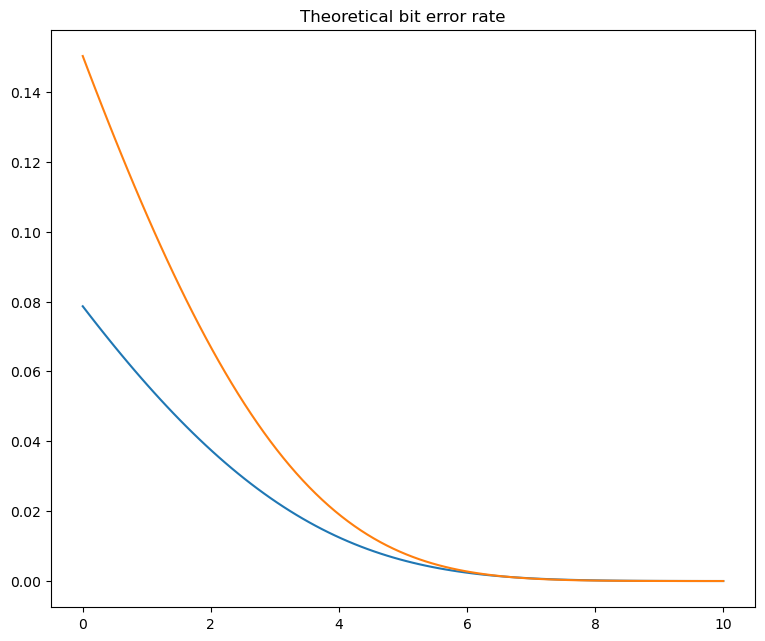

In [186]:
 
    #Theory: Take SNR in an area of 0 to 10
    eb_no_range_dB = np.linspace(0,10,100)
    eb_no_range_dB_Soft = np.arange(0,11,0.25) #nimmt für das E_B/N_0 in gleichmäßigen Abständen Werte zwischen 0 und 10
    eb_no_range = 10**(eb_no_range_dB/10) #-> Umrechnung in linearen Wert
    
    theoretic_ber = qfunc(np.sqrt(2*eb_no_range)) # ohne Codierung, gilt für BPSK, da E_b = E_s; im uncodierten Fall ist die BER gleich der FER; wenn ein Bit falsch ist, dann ist das gesamte Frame falsch

    
    

    theoretic_pb_74_Hamming = qfunc(np.sqrt(2*eb_no_range * Code_Rate)) # gilt für ein Informationsbit; daher mit Code Rate
    #theoretic_pb_74_Hamming = qfunc(np.sqrt(2*eb_no_range)) #warum hier? Dann scheint es zu passen; aber Graph stimmt nicht mit VL überein



    #theoretic_pb_74_Hamming_FER = qfunc(np.sqrt(2*eb_no_range*Code_Rate)) 

    

    #sigma_range = np.sqrt(1/(2*es_no_range)) 

    # Plotting the theoretical graph of BER: 
    plt.figure(figsize = (20, 7.5))

    ax = plt.subplot(1,2,1)
    ax.set_title('Theoretical bit error rate')
    plt.plot(eb_no_range_dB, theoretic_ber, label = "uncoded")
    plt.plot(eb_no_range_dB, theoretical_BER_Coded(theoretic_pb_74_Hamming), label = "(7,4)-Hamming_Hard")
    BER_hamming_soft = [main_function_SD(eb_no_range_dB_Soft, 10, 100) for eb_no in eb_no_range_dB]
    plt.plot(eb_no_range_dB, BER_hamming_soft)
    #plt.scatter(eb_no_dB, BER_sim, marker = 'x', color = 'r')
    plt.yscale('log')
    plt.xlabel('$E_b/N_0$')
    plt.ylabel('BER')
    plt.ylim(1e-7, 1)
    plt.legend()
    plt.grid()
    #theoretical_BER_Coded(theoretic_ber_74_Hamming)

    """
    # Plotting theoretical graph of FER
    ax = plt.subplot(1,2,2)
    ax.set_title('Theoretical frame error rate')
    plt.plot(eb_no_range_dB, theoretic_ber, label = "uncoded")
    plt.plot(eb_no_range_dB, theoretical_FER_Coded(theoretic_pb_74_Hamming_FER), label = "(7,4)-Hamming")
    plt.scatter(eb_no_dB, FER_sim, marker = 'x', color = 'r')
    plt.yscale('log')
    plt.xlabel('$E_b/N_0$')
    plt.ylabel('FER')
    plt.ylim(1e-10, 1)
    plt.legend()
    plt.grid()
    """

In [4]:
import numpy as np

# Beispiel: Binäres Array
arr = np.array([0, 1, 0, 1, 1, 0, 1])

# Positionen der Einsen extrahieren
indices = np.where(arr == 1)[0]

print(indices)


[1 3 4 6]


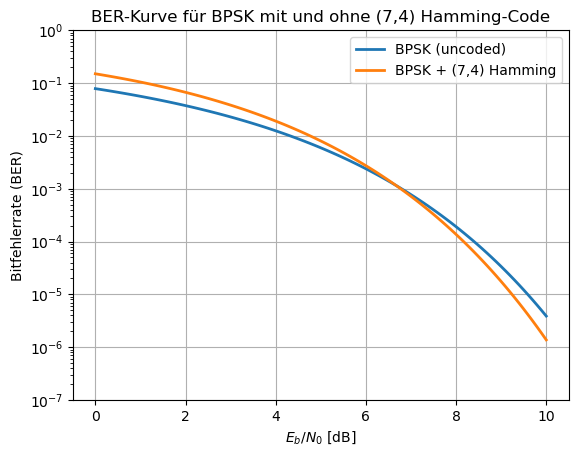

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import comb, erfc

# Q-Funktion über erfc
def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

# Uncodierte BER für BPSK
def ber_bpsk(EbN0_dB):
    EbN0 = 10**(EbN0_dB / 10)
    return Q(np.sqrt(2 * EbN0))

# Codierte BER für (7,4)-Hamming Code
def ber_hamming74(EbN0_dB):
    R = 4 / 7  # Code rate
    EbN0 = 10**(EbN0_dB / 10)
    EsN0 = EbN0 * R  # E_s = R * E_b 
    Pb = Q(np.sqrt(2 * EsN0))  # Bitfehlerrate ohne Codierung 
    #print(Pb) 
    
    # Berechne BER nach Codierung (nur ab 2 Fehler nicht korrigierbar)
    P_coded = np.zeros_like(Pb)
    for i in range(2, 8):  # 2 bis 7 Fehler nicht korrigierbar
        P_coded += (i * comb(7, i) * (Pb**i) * ((1 - Pb)**(7 - i)))
        #print(P_coded) 
    return P_coded / 4  # Auf 4 Nutzbits normalisieren 
    

# x-Achse: Eb/N0 in dB
EbN0_dB = np.linspace(0, 10, 100)

# Berechnungen
ber_uncoded = ber_bpsk(EbN0_dB)
ber_coded = ber_hamming74(EbN0_dB)

# Plotten
plt.semilogy(EbN0_dB, ber_uncoded, label='BPSK (uncoded)', linewidth=2)
plt.semilogy(EbN0_dB, ber_coded, label='BPSK + (7,4) Hamming', linewidth=2)

plt.grid()
plt.xlabel('$E_b/N_0$ [dB]')
plt.ylabel('Bitfehlerrate (BER)')
plt.title('BER-Kurve für BPSK mit und ohne (7,4) Hamming-Code')
plt.legend()
plt.ylim(1e-7, 1)
plt.show()
#print(ber_hamming74(6))
#print(ber_bpsk(0))



In [146]:
print(parity_Check_Matrix)
print(syndrom(parity_Check_Matrix, [1,0,1,1,0,1,0]))

[[1 1 0 1 1 0 0]
 [1 0 1 1 0 1 0]
 [0 1 1 1 0 0 1]]
[0 0 0]


In [ ]:
print(parity_Check_Matrix)
syndr = [0,0,1]


for j in range(7):
    if np.array_equal(parity_Check_Matrix[:,j], syndr):
        bit_flip = j
        break

print(bit_flip)

[[1 1 0 1 1 0 0]
 [1 0 1 1 0 1 0]
 [0 1 1 1 0 0 1]]
[1 1 0]
[1 0 1]
[0 1 1]
[1 1 1]
[1 0 0]
[0 1 0]
[0 0 1]
6


/tmp/ipykernel_6152/2371584986.py:20: DeprecationWarning: `np.math` is a deprecated alias for the standard library `math` module (Deprecated Numpy 1.25). Replace usages of `np.math` with `math`
  FER += (np.math.comb(7, i)) * (P_b**i) * ((1 - P_b)**(7 - i))


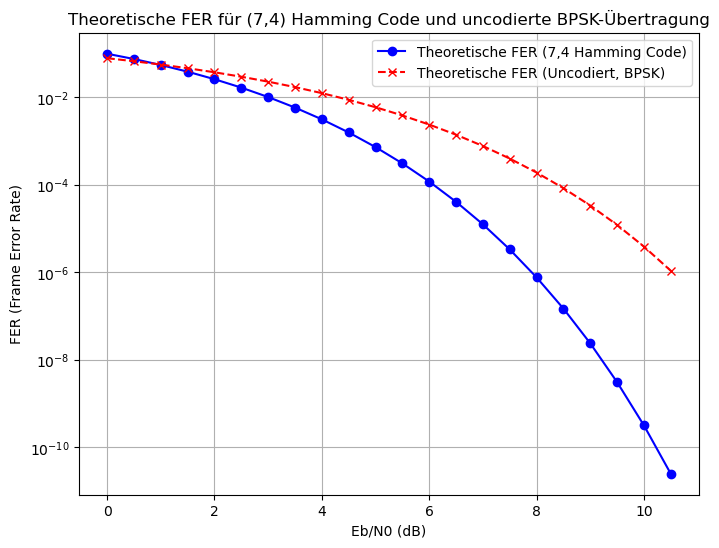

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import erfc

# Q-Funktion (Komplementäre Fehlerfunktion)
def Q(x):
    return 0.5 * erfc(x / np.sqrt(2))

# Theoretische FER für den (7,4) Hamming-Code
def theoretical_FER_hamming(Eb_N0_dB):
    # Konvertiere Eb/N0 von dB in linear
    Eb_N0_lin = 10**(Eb_N0_dB / 10)

    # Berechne P_b (Bitfehlerwahrscheinlichkeit)
    P_b = Q(np.sqrt(2 * Eb_N0_lin))

    # Berechne FER
    FER = 0
    for i in range(2, 8):  # Summe für i = 2 bis 7
        FER += (np.math.comb(7, i)) * (P_b**i) * ((1 - P_b)**(7 - i))
    return FER

# Theoretische FER für den uncodierten Fall (BPSK)
def theoretical_FER_uncoded(Eb_N0_dB):
    # Konvertiere Eb/N0 von dB in linear
    Eb_N0_lin = 10**(Eb_N0_dB / 10)

    # Berechne P_b (Bitfehlerwahrscheinlichkeit) für BPSK
    P_b = Q(np.sqrt(2 * Eb_N0_lin))

    # Da es keinen Code gibt, ist FER gleich P_b
    return P_b

# Eb/N0 Werte (in dB)
Eb_N0_dB_values = np.arange(0, 11, 0.5)

# Berechne FER für den (7,4) Hamming-Code und uncodierten Fall
FER_hamming = [theoretical_FER_hamming(Eb_N0) for Eb_N0 in Eb_N0_dB_values]
FER_uncoded = [theoretical_FER_uncoded(Eb_N0) for Eb_N0 in Eb_N0_dB_values]

# Plot
plt.figure(figsize=(8, 6))
plt.plot(Eb_N0_dB_values, FER_hamming, label='Theoretische FER (7,4 Hamming Code)', color='blue', marker='o')
plt.plot(Eb_N0_dB_values, FER_uncoded, label='Theoretische FER (Uncodiert, BPSK)', color='red', linestyle='--', marker='x')
plt.yscale('log')  # Logarithmische Skalierung für bessere Sichtbarkeit der Fehler
plt.xlabel('Eb/N0 (dB)')
plt.ylabel('FER (Frame Error Rate)')
plt.title('Theoretische FER für (7,4) Hamming Code und uncodierte BPSK-Übertragung')
plt.legend()
plt.grid(True)
plt.show()


In [139]:
Soft_desicion_Matrix = soft_desicion_Matrix(code_words)
print(Soft_desicion_Matrix)

[[ 1  1  1  1  1  1  1]
 [ 1  1  1 -1 -1 -1 -1]
 [ 1  1 -1  1  1 -1 -1]
 [ 1  1 -1 -1 -1  1  1]
 [ 1 -1  1  1 -1  1 -1]
 [ 1 -1  1 -1  1 -1  1]
 [ 1 -1 -1  1 -1 -1  1]
 [ 1 -1 -1 -1  1  1 -1]
 [-1  1  1  1 -1 -1  1]
 [-1  1  1 -1  1  1 -1]
 [-1  1 -1  1 -1  1 -1]
 [-1  1 -1 -1  1 -1  1]
 [-1 -1  1  1  1 -1 -1]
 [-1 -1  1 -1 -1  1  1]
 [-1 -1 -1  1  1  1  1]
 [-1 -1 -1 -1 -1 -1 -1]]
